#Capstone Project - Bangalore City Pizza EatOut Area Analysis (Week 2)
##Applied Data Science Capstone by IBM/Coursera

###Table of contents
* Introduction: Business Problem
* Data
* Methodology
* Analysis
* Results and Discussion
* Conclusion

###Introduction: Business Problem
    
One of my enterprenuer friend wants to open new pizza eatout place in Bangalore city. One day when we met for casual meet, he explained me about his plans. His basic requirements includes,

1. He wants to open pizza eatout in a place, where there are less no. of pizza places, so that competition will be less and profit will be more.

2. The place should be economical. In sense investment price should be less and profit should be more.

In this project we will try to find an optimal location to set-up pizza eatout. Specifically, this report will be targeted to stakeholders interested in opening an Pizza Eatout in Bangalore, Karnataka.

Since there are lots of pizza eatout in Bangalore, we will try to detect locations that are not already crowded with Pizza places. We would also prefer locations as close to city center as possible, assuming that first two conditions are met.

We will use our data science powers to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

###Data 

Based on definition of our problem, factors that will influence our decission are:

* number of existing pizza places in the neighborhood

Following data sources will be needed to extract/generate the required information:

We have prepared .xls file which has main deatils including area pincode, latitude and longitude. This data set I have committed in kaggle.

https://www.kaggle.com/hegdetapan/bangaloreareaspincodewithlatitudelongitude

* number of pizza places and location in every neighborhood will be obtained using Foursquare API

*Install necessary libs and packages.*

*Install geopy package,*

*folium package for map visualization.*

In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

!conda install -c conda-forge geocoder --yes

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



`Read BangaloreAreaLatLongDetailscsv.csv file. This file contains pincode,latitude, and longitude details of areas of Bangalore.`

In [3]:
df_blr = pd.read_csv('/Users/c5281159/PycharmProjects/lab-files/BangaloreAreaLatLongDetailscsv.csv')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df_blr.head(10)

,Area,Pincode,Latitude,Longitude
0,Adugodi,560 030,12.971600,77.594600
1,Agaram,560 007,12.843100,77.486300
2,Air Force Stn. Yelahanka,560 063,13.104800,77.576300
3,Banashankari,560 050,12.925453,77.546761
4,Banashankari 2nd Stage,560 070,12.924900,77.566200
5,Banashankari 3rd Stage,560 085,12.927100,77.554800
6,Bangalore City H.O.,560 002,12.972442,77.580643
7,Bangalore G.P.O.,560 001,12.972442,77.580643
8,Bangalore University,560 056,12.946200,77.510300
9,Bannerghatta,560 083,12.942600,77.602700


`Get the dimensions of the dataframe `

In [5]:
# print the dimensions of the dataframe
print(df_blr.shape)

(90, 4)


`Get geograpical coordinate of Bengaluru City`

In [6]:
address = 'Bengaluru'

geolocator = Nominatim(user_agent="blr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bengaluru City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bengaluru City are 12.9791198, 77.5912997.


In [7]:
print(df_blr.dtypes)

Area          object
Pincode       object
Latitude     float64
Longitude    float64
dtype: object


In [8]:
geo_data=df_blr[['Area','Latitude','Longitude']]
geo_data
#print(geo_data.dtypes)
geo_data.head(20)

,Area,Latitude,Longitude
0,Adugodi,12.971600,77.594600
1,Agaram,12.843100,77.486300
2,Air Force Stn. Yelahanka,13.104800,77.576300
3,Banashankari,12.925453,77.546761
4,Banashankari 2nd Stage,12.924900,77.566200
5,Banashankari 3rd Stage,12.927100,77.554800
6,Bangalore City H.O.,12.972442,77.580643
7,Bangalore G.P.O.,12.972442,77.580643
8,Bangalore University,12.946200,77.510300
9,Bannerghatta,12.942600,77.602700


`Using folium library, print map of Bengaluru city and its areas`

In [9]:
# create map of Toranto using latitude and longitude values
map_blr = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Area in zip(geo_data['Latitude'], geo_data['Longitude'], geo_data['Area']):
    label = '{}'.format(Area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_blr)  
    
map_blr

`Client ID, Secret of Foursquare API.`

In [11]:
CLIENT_ID = 'BBB441WVOKMI1SPHXB4PTKZVFNGI10VUPHEIXUN2C11PRRJQ' #  Foursquare ID
CLIENT_SECRET = 'WY1BIGDADRVPBBG2YS13QARUXQIM4AR1B3KEUOIALD4500KN' #  Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BBB441WVOKMI1SPHXB4PTKZVFNGI10VUPHEIXUN2C11PRRJQ
CLIENT_SECRET:WY1BIGDADRVPBBG2YS13QARUXQIM4AR1B3KEUOIALD4500KN


`Try to print latitude,longitude of any area. Eg : Here I tried to get 'Basavangudi' area details using foursquare api.`

In [12]:
Basavanagudi_data=geo_data[geo_data['Area'].str.contains("Basavangudi")]
Basavanagudi_data.head()

,Area,Latitude,Longitude
12,Basavangudi,12.9422,77.5748


In [13]:
neighborhood_latitude = Basavanagudi_data.loc[12, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Basavanagudi_data.loc[12, 'Longitude'] # neighborhood longitude value

neighborhood_name = Basavanagudi_data.loc[12, 'Area'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Basavangudi are 12.9422, 77.5748.


In [14]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=BBB441WVOKMI1SPHXB4PTKZVFNGI10VUPHEIXUN2C11PRRJQ&client_secret=WY1BIGDADRVPBBG2YS13QARUXQIM4AR1B3KEUOIALD4500KN&v=20180605&ll=12.9422,77.5748&radius=500&limit=100'

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f3252a40570a56adc7413c7'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Vishveshwara Puram',
  'headerFullLocation': 'Vishveshwara Puram, Bangalore',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 17,
  'suggestedBounds': {'ne': {'lat': 12.946700004500004,
    'lng': 77.57940867905675},
   'sw': {'lat': 12.937699995499996, 'lng': 77.57019132094324}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4dd77aabd4c05d5096ea945d',
       'name': 'Rogue Elephant',
       'location': {'lat': 12.941541392293871,
        'lng': 77.57723352370775,
        'labeledLatLngs': [{'label': 'display',
          'lat': 12.941541392293871,
    

`function that extracts the category of the venue`

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(50)

/Users/c5281159/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Rogue Elephant,Restaurant,12.941541,77.577234
1,UD - Upahara Darshini,Indian Restaurant,12.939425,77.571385
2,South Thindies,Indian Restaurant,12.938533,77.575437
3,By 2 Coffee,Indian Restaurant,12.942161,77.570588
4,Vidyarthi Bhavan,Indian Restaurant,12.945082,77.571415
5,Gokul,Asian Restaurant,12.944348,77.571079
6,Soho Bar & Grill,Hookah Bar,12.944686,77.572967
7,Shiv Sagar,Indian Restaurant,12.944308,77.572731
8,Cafe Mondo,Café,12.939682,77.577596
9,Roti Ghar,Indian Restaurant,12.944929,77.571867


In [18]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
   
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [19]:
def get_venue_details(venue_id):
        
    
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

`prepare neighborhood list that contains pizza places`

In [20]:
# prepare neighborhood list that contains indian resturants
column_names=['Area','ID','Name','Count']
pizza_to=pd.DataFrame(columns=column_names)
count=1
for row in geo_data.values.tolist():
    Area, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    pizza=venues[venues['Category']=='Pizza Place']   
    print('(',count,'/',len(geo_data),')','Pizza Place in '+Area+', '+Area+':'+str(len(pizza)))
    for pizza_detail in pizza.values.tolist():
        id, name , category=pizza_detail
        pizza_to = pizza_to.append({'Area': Area,
                                                'ID': id,
                                                'Name' : name,
                                                'Count': str(len(pizza)),
                                               }, ignore_index=True)
    count+=1

( 1 / 90 ) Pizza Place in Adugodi, Adugodi:1
( 2 / 90 ) Pizza Place in Agaram, Agaram:0
( 3 / 90 ) Pizza Place in Air Force Stn. Yelahanka, Air Force Stn. Yelahanka:0
( 4 / 90 ) Pizza Place in Banashankari, Banashankari:3
( 5 / 90 ) Pizza Place in Banashankari 2nd Stage, Banashankari 2nd Stage:3
( 6 / 90 ) Pizza Place in Banashankari 3rd Stage, Banashankari 3rd Stage:1
( 7 / 90 ) Pizza Place in Bangalore City H.O., Bangalore City H.O.:0
( 8 / 90 ) Pizza Place in Bangalore G.P.O., Bangalore G.P.O.:0
( 9 / 90 ) Pizza Place in Bangalore University, Bangalore University:0
( 10 / 90 ) Pizza Place in Bannerghatta, Bannerghatta:1
( 11 / 90 ) Pizza Place in Bannerghatta Road, Bannerghatta Road:1
( 12 / 90 ) Pizza Place in Bansawadi, Bansawadi:1
( 13 / 90 ) Pizza Place in Basavangudi, Basavangudi:1
( 14 / 90 ) Pizza Place in Basaveswaranagar, Basaveswaranagar:2
( 15 / 90 ) Pizza Place in Benson Town, Benson Town:1
( 16 / 90 ) Pizza Place in Byatarayanapura, Byatarayanapura:1
( 17 / 90 ) Pizza P

In [21]:

pizza_to.head(90)

,Area,ID,Name,Count
0,Adugodi,4ce90bc5595cb1f78384cc14,Domino's Pizza,1
1,Banashankari,4e15e24c63658532efa39621,Domino's Pizza,3
2,Banashankari,559ebd93498eba17e2fefc6c,Domino's Pizza,3
3,Banashankari,4c7a2e9d81bca0938accff14,Pizza Hut,3
4,Banashankari 2nd Stage,548ff23c498e3cbb402f3df6,Vinny's,3
...,...,...,...,...
71,Vidyaranyapura,4e6a2e43b993d5439f19c3d2,Domino's Pizza,1
72,Vijayanagar,4c0ce89f336220a115d7c977,Pizza Hut,1
73,Vyalikaval,4e196d94d22d5122588ce6e7,Domino's Pizza,1
74,Viveknagar,4c1b8d04b9f876b05a617a46,Papa Johns,1


In [22]:

pizza_to.shape

(76, 4)

<font color=blue>We got 78 Pizza places across Bangalore City</font>

`Plot bar graph`

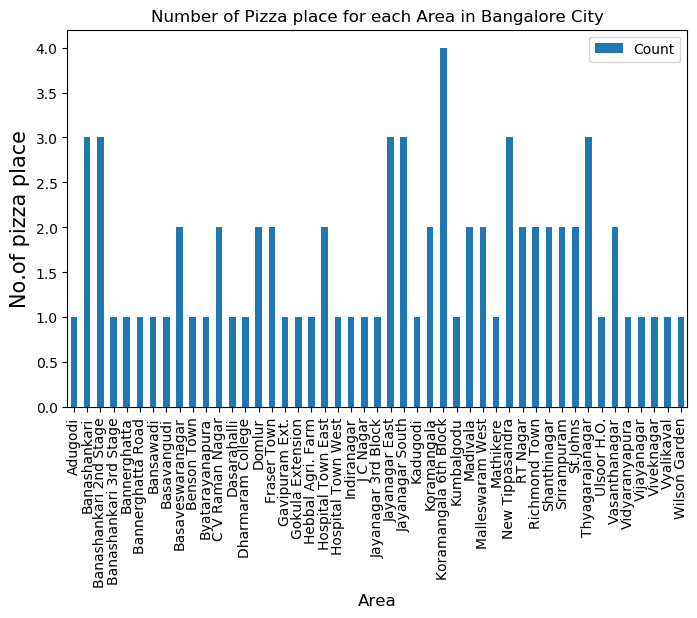

In [24]:

plt.figure(figsize=(8,5), dpi = 100)
# title
plt.title('Number of Pizza place for each Area in Bangalore City')
#On x-axis
plt.xlabel('Area', fontsize = 12)
#On y-axis
plt.ylabel('No.of pizza place', fontsize=15)
#giving a bar plot
pizza_to.groupby('Area')['Count'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

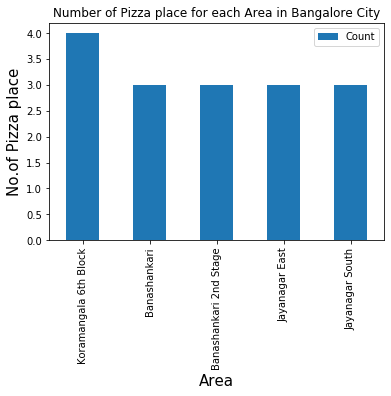

In [26]:
# title
plt.title('Number of Pizza place for each Area in Bangalore City')
#On x-axis
plt.xlabel('Area', fontsize = 15)
#On y-axis
plt.ylabel('No.of Pizza place', fontsize=15)
#giving a bar plot
pizza_to.groupby('Area')['Count'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

`From Above we can observe the Area named "Koramangala 6th Block"has most number of Pizza places.`

In [27]:

pizza_to.to_csv('pizza_stats_to.csv', index=False)

In [28]:
pizza_to_csv=pd.read_csv('pizza_stats_to.csv')

In [29]:
pizza_to_csv

,Area,ID,Name,Count
0,Adugodi,4ce90bc5595cb1f78384cc14,Domino's Pizza,1
1,Banashankari,4e15e24c63658532efa39621,Domino's Pizza,3
2,Banashankari,559ebd93498eba17e2fefc6c,Domino's Pizza,3
3,Banashankari,4c7a2e9d81bca0938accff14,Pizza Hut,3
4,Banashankari 2nd Stage,548ff23c498e3cbb402f3df6,Vinny's,3
...,...,...,...,...
71,Vidyaranyapura,4e6a2e43b993d5439f19c3d2,Domino's Pizza,1
72,Vijayanagar,4c0ce89f336220a115d7c977,Pizza Hut,1
73,Vyalikaval,4e196d94d22d5122588ce6e7,Domino's Pizza,1
74,Viveknagar,4c1b8d04b9f876b05a617a46,Papa Johns,1


In [30]:
pizza_to_csv.shape

(76, 4)

In [31]:
pizza_to_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Area    76 non-null     object
 1   ID      76 non-null     object
 2   Name    76 non-null     object
 3   Count   76 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 2.5+ KB


In [32]:
pizza_to_csv[['Count']]=pizza_to_csv[['Count']].astype('float64')

In [33]:
pizza_to_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    76 non-null     object 
 1   ID      76 non-null     object 
 2   Name    76 non-null     object 
 3   Count   76 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.5+ KB


In [34]:
pizza_to_csv.head(10)

,Area,ID,Name,Count
0,Adugodi,4ce90bc5595cb1f78384cc14,Domino's Pizza,1.0
1,Banashankari,4e15e24c63658532efa39621,Domino's Pizza,3.0
2,Banashankari,559ebd93498eba17e2fefc6c,Domino's Pizza,3.0
3,Banashankari,4c7a2e9d81bca0938accff14,Pizza Hut,3.0
4,Banashankari 2nd Stage,548ff23c498e3cbb402f3df6,Vinny's,3.0
5,Banashankari 2nd Stage,4ffb0059e4b0ae40eeaba903,Domino's Pizza,3.0
6,Banashankari 2nd Stage,4c948ff0f7cfa1cdebdfb415,Pizza Hut,3.0
7,Banashankari 3rd Stage,4c7a2e9d81bca0938accff14,Pizza Hut,1.0
8,Bannerghatta,507846cbe4b00277f27390c6,Domino's Pizza,1.0
9,Bannerghatta Road,507846cbe4b00277f27390c6,Domino's Pizza,1.0


In [35]:
to_pizzaria_stats=pizza_to_csv.groupby('Area',as_index=False).mean()[['Area','Count']]
to_pizzaria_stats.columns=['Area','Average Count']

In [36]:
to_pizzaria_stats.sort_values(['Average Count'],ascending=False).head(10)

,Area,Average Count
28,Koramangala 6th Block,4.0
2,Banashankari 2nd Stage,3.0
25,Jayanagar South,3.0
24,Jayanagar East,3.0
1,Banashankari,3.0
33,New Tippasandra,3.0
39,Thyagarajanagar,3.0
15,Fraser Town,2.0
27,Koramangala,2.0
30,Madivala,2.0


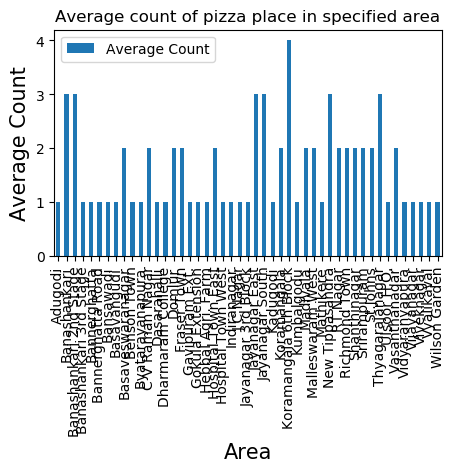

In [37]:
plt.figure(figsize=(5,3), dpi = 100)
# title
plt.title('Average count of pizza place in specified area')
#On x-axis
plt.xlabel('Area', fontsize = 15)
#On y-axis
plt.ylabel('Average Count', fontsize=15)
#giving a bar plot
to_pizzaria_stats.groupby('Area').mean()['Average Count'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

`we will consider all the areas with average count lesser than 2.0 to visualize on map`

In [38]:
to_pizzaria_stats=to_pizzaria_stats[to_pizzaria_stats['Average Count']<2.0]

In [39]:

to_pizzaria_stats.sort_values(['Average Count'],ascending=False).head()

,Area,Average Count
0,Adugodi,1.0
3,Banashankari 3rd Stage,1.0
45,Vyalikaval,1.0
44,Viveknagar,1.0
43,Vijayanagar,1.0


In [40]:

to_pizzaria_stats=pd.merge(to_pizzaria_stats,geo_data, on='Area')

In [41]:
to_pizzaria_stats=to_pizzaria_stats[['Area','Latitude','Longitude','Average Count']]

`List of areas in which pizza places counts are 2 or less than 2.`

In [43]:

to_pizzaria_stats.head(10)


,Area,Latitude,Longitude,Average Count
0,Adugodi,12.9716,77.59460,1.0
1,Banashankari 3rd Stage,12.9271,77.55480,1.0
2,Bannerghatta,12.9426,77.60270,1.0
3,Bannerghatta Road,12.9426,77.60270,1.0
4,Bansawadi,13.0108,77.64930,1.0
5,Basavangudi,12.9422,77.57480,1.0
6,Benson Town,12.9966,77.60420,1.0
7,Byatarayanapura,13.0588,77.59385,1.0
8,Dasarahalli,13.0458,77.51110,1.0
9,Dharmaram College,12.9376,77.59910,1.0


`Now above we have the pizza places which has count lesser or equal to 2.0 and their Geo-Co-ordinates

Lets Visualise it!`

In [44]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="blr_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [45]:
to_map = folium.Map(location=geo_location('Bengaluru'), zoom_start=12)

In [46]:
to_map

In [47]:
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in to_pizzaria_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [48]:
to_pizzaria_stats['Label']=to_pizzaria_stats['Area']+', '+'('+to_pizzaria_stats['Average Count'].map(str)+')'

`add pop-up text to each marker on the map`

In [49]:
# add pop-up text to each marker on the map
for lat, lng, label in to_pizzaria_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(to_map)        
# add incidents to map
to_map.add_child(incidents)

In [50]:
to_pizzaria_stats.sort_values(['Average Count'],ascending=False).head(10)

,Area,Latitude,Longitude,Average Count,Label
0,Adugodi,12.9716,77.5946,1.0,"Adugodi, (1.0)"
1,Banashankari 3rd Stage,12.9271,77.5548,1.0,"Banashankari 3rd Stage, (1.0)"
24,Vyalikaval,13.0041,77.5749,1.0,"Vyalikaval, (1.0)"
23,Viveknagar,12.9496,77.6223,1.0,"Viveknagar, (1.0)"
22,Vijayanagar,12.9699,77.5333,1.0,"Vijayanagar, (1.0)"
21,Vidyaranyapura,13.0754,77.5591,1.0,"Vidyaranyapura, (1.0)"
20,Ulsoor H.O.,12.9815,77.6192,1.0,"Ulsoor H.O., (1.0)"
19,Mathikere,13.0320,77.5605,1.0,"Mathikere, (1.0)"
18,Kumbalgodu,12.9716,77.5946,1.0,"Kumbalgodu, (1.0)"
17,Kadugodi,12.9986,77.7631,1.0,"Kadugodi, (1.0)"


###Conclusion
Below are the Best Areas to open an Pizza EatOuts 
1. Adugodi
2. Banashankari 3rd Stage
3. Vyalikaval
4. VivekNagar
5. Vidyaranyapura
6. Ulsoor
7. Peenya
8. Mathikere
9. Kumbalgodu
10. Kadugodi 


###Limitations
The Count is highly dependent on Foursquare API details.
There might be some other pizza eatouts which are not listed in foursquare database.